In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("../data/generated_transactions.csv")
print("✅ Data Loaded Successfully")

print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

df.head()


✅ Data Loaded Successfully
Shape: (5000, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tx_id      5000 non-null   object 
 1   sender     5000 non-null   object 
 2   receiver   5000 non-null   object 
 3   amount     5000 non-null   float64
 4   timestamp  5000 non-null   object 
 5   type       5000 non-null   object 
 6   status     5000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 273.6+ KB
None

Missing values:
 tx_id        0
sender       0
receiver     0
amount       0
timestamp    0
type         0
status       0
dtype: int64

Duplicate Rows: 0


,tx_id,sender,receiver,amount,timestamp,type,status
0,d83a431a-9113-4340-92ea-48fbdb0e4584,0x13b1c8b0e696aff8b4fee742119b549b605f3cbc,0xd0df53e296c1e3115fccc3d7cdf4ba495e593b56,3.5726,2024-11-19 11:58:33,mint,success
1,130fdce4-991c-4fbd-be33-fec25bd15da5,0x3e69ad05716bdc834db72c4d6d44439a7c8a902b,0x4814be124d7fe3b240eb46061f7ddfab468fe122,3.1927,2023-04-28 00:47:57,mint,success
2,c906a07a-0ab6-4732-bc3f-2e70a3e098d3,0x9ad1331c5b6c5a641acffb32719c66a80c6e1a17,0x578cea5f899b0dfbf05c7fbcfda1a644b2a47787,1.6672,2023-07-15 09:18:40,transfer,success
3,5ca8f003-7711-4123-a231-07023ef79ae6,0x7399dbeebe2f88bc6ac4e3fd7ddb836a4bce322f,0x7be3dfb5b6fcbae542ea85e76cc19916a20f6c1e,2.3793,2024-01-08 18:27:36,swap,failed
4,f5465e67-4c2d-479b-af3e-9e0a03e6ccd7,0x3867d222ba91236ad4d12c31056626f9e798629c,0xded1f838ae6aa5fcd0f13481b37ee88e5bdccb3d,2.8079,2025-02-06 11:35:19,swap,success


In [ ]:
import numpy as np

np.random.seed(42)  
df['risk_score'] = np.random.rand(len(df))

df['is_fraud'] = np.where(df['risk_score'] > 0.8, 1, 0)


In [ ]:
df.describe()

print("Unique Types:", df['type'].unique())
print("Unique Statuses:", df['status'].unique())

print("\nBy type:\n", df['type'].value_counts())
print("\nBy status:\n", df['status'].value_counts())
print("\nFraud counts:\n", df['is_fraud'].value_counts())


Unique Types: ['mint' 'transfer' 'swap' 'contract' 'stake']
Unique Statuses: ['success' 'failed' 'pending']

By type:
 type
transfer    1030
swap        1001
contract    1001
mint         987
stake        981
Name: count, dtype: int64

By status:
 status
failed     1686
pending    1665
success    1649
Name: count, dtype: int64

Fraud counts:
 is_fraud
0    4001
1     999
Name: count, dtype: int64


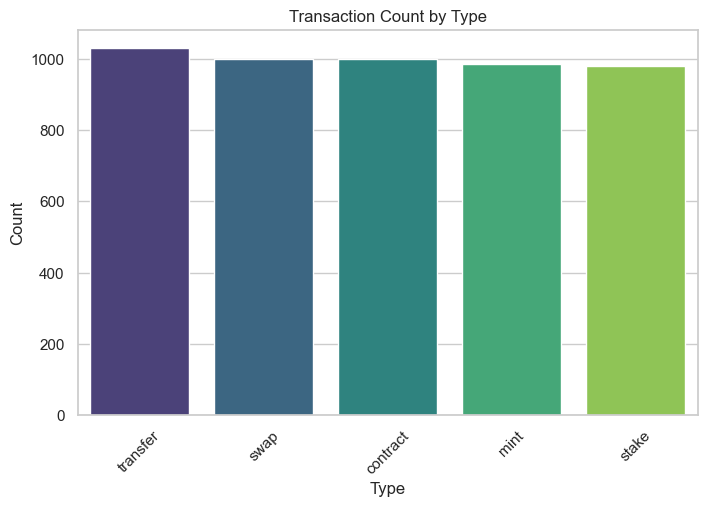

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')
plt.title('Transaction Count by Type')
plt.ylabel('Count')
plt.xlabel('Type')
plt.xticks(rotation=45)
plt.show()


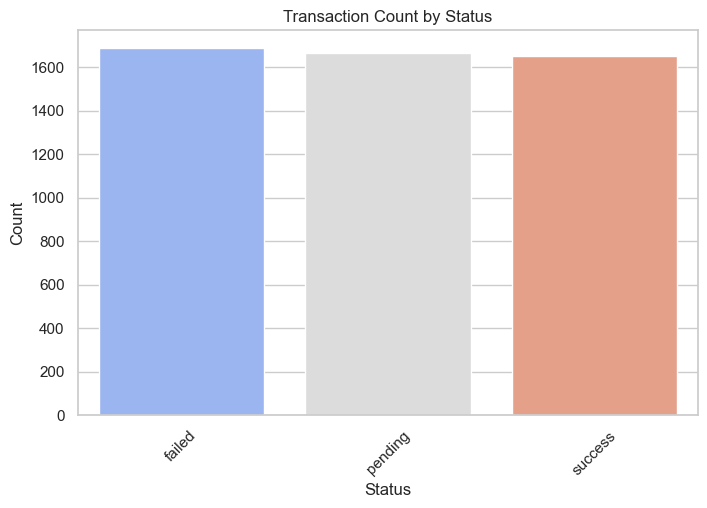

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette='coolwarm')
plt.title('Transaction Count by Status')
plt.ylabel('Count')
plt.xlabel('Status')
plt.xticks(rotation=45)
plt.show()


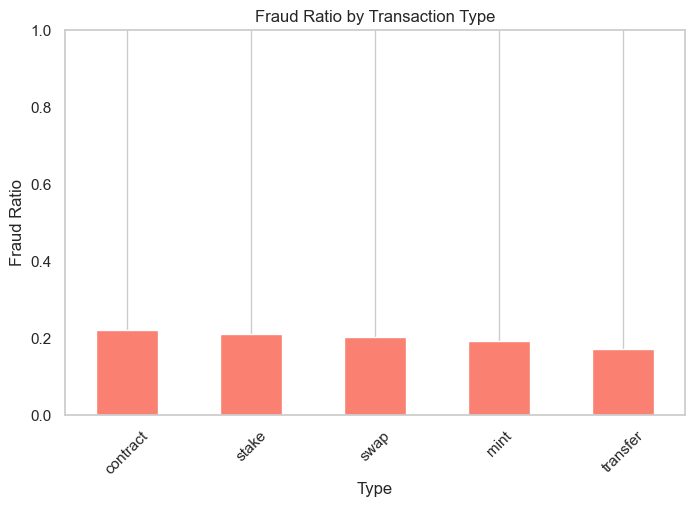

In [10]:
fraud_type_ratio = df.groupby('type')['is_fraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
fraud_type_ratio.plot(kind='bar', color='salmon')
plt.title('Fraud Ratio by Transaction Type')
plt.ylabel('Fraud Ratio')
plt.xlabel('Type')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


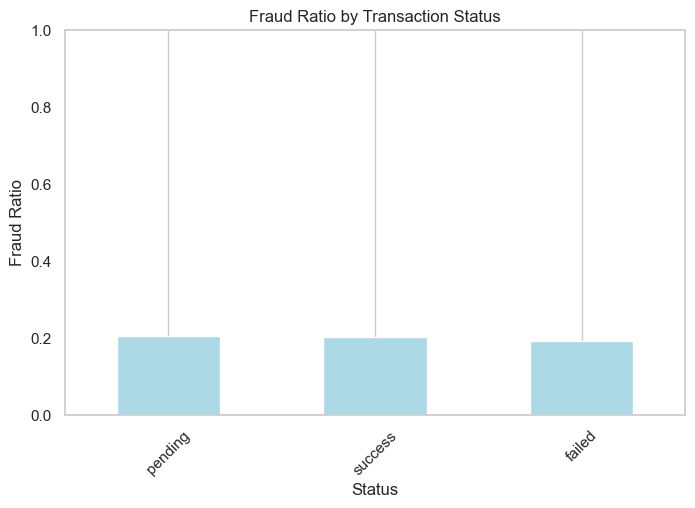

In [11]:
fraud_status_ratio = df.groupby('status')['is_fraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
fraud_status_ratio.plot(kind='bar', color='lightblue')
plt.title('Fraud Ratio by Transaction Status')
plt.ylabel('Fraud Ratio')
plt.xlabel('Status')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


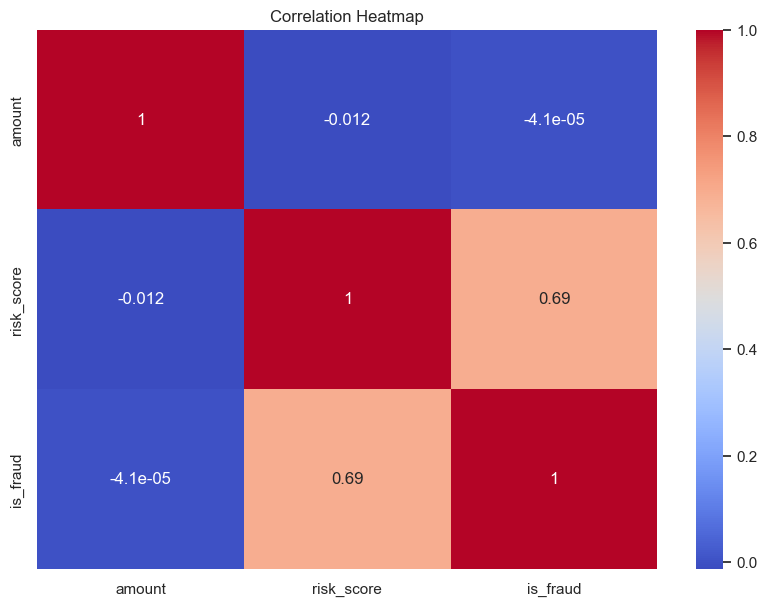

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


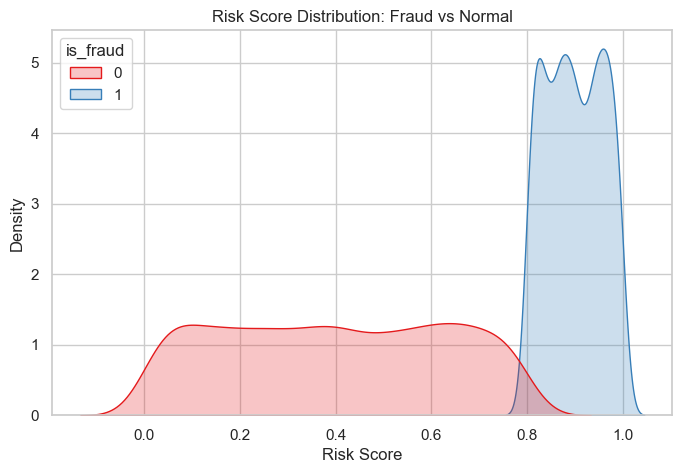

In [13]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='risk_score', hue='is_fraud', fill=True, common_norm=False, palette='Set1')
plt.title('Risk Score Distribution: Fraud vs Normal')
plt.xlabel('Risk Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()


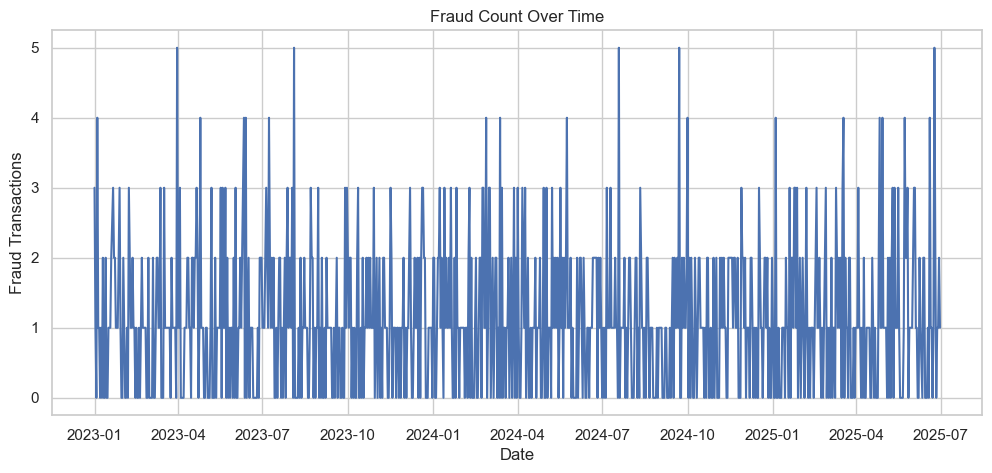

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.figure(figsize=(12,5))
df.groupby(df['timestamp'].dt.date)['is_fraud'].sum().plot()
plt.title('Fraud Count Over Time')
plt.ylabel('Fraud Transactions')
plt.xlabel('Date')
plt.grid(True)
plt.show()
